In [1]:
import numpy as np
import katpoint
import matplotlib
from matplotlib import pyplot as plt
import pylab as pl
from datetime import timedelta
from matplotlib.colors import LogNorm

In [2]:
# target location and survey start time  
# Target_RA,Target_Dec = "10:00:28.6", "02:12:21"
Target_RA,Target_Dec = "10:00:28.6", "-90:00:00"
target = katpoint.Target('Simulated_Target, radec target, %s, %s'%(Target_RA, Target_Dec))

time1 = katpoint.Timestamp(timestamp= '2018-04-19 14:15:54.000') 
time2 = katpoint.Timestamp(timestamp= '2018-05-06 13:33:03.000')

# use a specific time as the start time (in UTC ... )
# two observations
start_timestamp1 = katpoint.Timestamp(str(time1)) 
start_timestamp2 = katpoint.Timestamp(str(time2))

# Define a time range "t" we want to step through
# time1--6h5m52s=21952s  21952/8=2744
# time2--5h5m52s=18352s  18352/8=2294
# t1 = start_timestamp1.secs + np.linspace(0.0, 21952, 2744)  # 2744 is once every 8 second
# t2 = start_timestamp2.secs + np.linspace(0.0, 18352, 2294)  # 2294 is once every 8 second

# time1--5h=18000s  18000/8=2250
# time2--5h=18000s  18000/8=2250
t1 = start_timestamp1.secs + np.linspace(0.0, 18000, 2250)  # 2744 is once every 8 second
t2 = start_timestamp2.secs + np.linspace(0.0, 18000, 2250)  # 2294 is once every 8 second
print ("Simulation start time %s and %s"%(start_timestamp1, start_timestamp2) )

zz = 1.2  # redshift   L band z:0-0.58  f:900-1420 MHz
LL = 0.21106 # wavelength  λ = 21.106cm = 0.21106m
ll = LL*(1+zz) # redshift wavelength

Simulation start time 2018-04-19 14:15:54 and 2018-05-06 13:33:03


In [3]:
# MeerKAT location,  64 dishes
ants=['' for x in range(64)]
ants[0]=katpoint.Antenna('m000, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -8.264   -207.290 8.597')
ants[1]=katpoint.Antenna('m001, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 1.121 -171.762  8.471')
ants[2]=katpoint.Antenna('m002, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -32.113  -224.236  8.645')
ants[3]=katpoint.Antenna('m003, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -66.518  -202.276  8.285')
ants[4]=katpoint.Antenna('m004, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -123.624  -252.946  8.513')
ants[5]=katpoint.Antenna('m005, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -102.088  -283.120  8.875')
ants[6]=katpoint.Antenna('m006, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -18.232  -295.428  9.188')
ants[7]=katpoint.Antenna('m007, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -89.592  -402.732  9.769')
ants[8]=katpoint.Antenna('m008, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -93.527  -535.026  10.445')
ants[9]=katpoint.Antenna('m009, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 32.357   -371.056  10.140')
#
ants[10]=katpoint.Antenna('m010, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 88.095    -511.872  11.186')
ants[11]=katpoint.Antenna('m011, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 84.012 -352.078 10.151')
ants[12]=katpoint.Antenna('m012, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 140.019  -368.267  10.449')
ants[13]=katpoint.Antenna('m013, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 236.792  -393.460  11.124')
ants[14]=katpoint.Antenna('m014, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 280.669  -285.792  10.547')
ants[15]=katpoint.Antenna('m015, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 210.644 -219.142  9.738')
ants[16]=katpoint.Antenna('m016, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 288.159  -185.873  9.795')
ants[17]=katpoint.Antenna('m017, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 199.624  -112.263  8.955')
ants[18]=katpoint.Antenna('m018, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 105.727  -245.870  9.529')
ants[19]=katpoint.Antenna('m019, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 170.787  -285.223  10.071')
#
ants[20]=katpoint.Antenna('m020, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 97.016  -299.638  9.877')
ants[21]=katpoint.Antenna('m021, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -295.966  -327.241  8.117')
ants[22]=katpoint.Antenna('m022, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -373.002  0.544 5.649')
ants[23]=katpoint.Antenna('m023, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -322.306  -142.185  6.825')
ants[24]=katpoint.Antenna('m024, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -351.046  150.088 4.845')
ants[25]=katpoint.Antenna('m025, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -181.978 225.617 5.068')
ants[26]=katpoint.Antenna('m026, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -99.004  17.045  6.811')
ants[27]=katpoint.Antenna('m027, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  40.475   -23.112 7.694')
ants[28]=katpoint.Antenna('m028, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -51.179  -87.170 7.636')
ants[29]=katpoint.Antenna('m029, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -88.762  -124.111  7.700')
#
ants[30]=katpoint.Antenna('m030, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 171.281  113.949 7.278')
ants[31]=katpoint.Antenna('m031, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 246.567  93.756  7.469')
ants[32]=katpoint.Antenna('m032, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 461.275 175.505 7.367')
ants[33]=katpoint.Antenna('m033, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, 580.678  863.959 3.600')
ants[34]=katpoint.Antenna('m034, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  357.811  -28.308 8.972')
ants[35]=katpoint.Antenna('m035, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  386.152  -180.894  10.290')
ants[36]=katpoint.Antenna('m036, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,   388.257  -290.759  10.812')
ants[37]=katpoint.Antenna('m037, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,   380.286  -459.309  12.172')
ants[38]=katpoint.Antenna('m038, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  213.308  -569.080  11.946')
ants[39]=katpoint.Antenna('m039, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  253.748  -592.147  12.441')
#
ants[40]=katpoint.Antenna('m040, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -26.858  -712.219  11.833')
ants[41]=katpoint.Antenna('m041, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -287.545  -661.678  9.949')
ants[42]=katpoint.Antenna('m042, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -361.714  -460.318  8.497')
ants[43]=katpoint.Antenna('m043, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -629.853  -128.326  5.264')
ants[44]=katpoint.Antenna('m044, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -896.164  600.497 -0.640')
ants[45]=katpoint.Antenna('m045, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -1832.860  266.750 0.108')
ants[46]=katpoint.Antenna('m046, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -1467.341  1751.923  -7.078')
ants[47]=katpoint.Antenna('m047, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -578.296  -517.297  7.615')
ants[48]=katpoint.Antenna('m048, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -2805.653  2686.863  -9.755')
ants[49]=katpoint.Antenna('m049, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -3605.957  436.462 2.696')
#
ants[50]=katpoint.Antenna('m050, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -2052.336  -843.715  5.338')
ants[51]=katpoint.Antenna('m051, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -850.255  -769.359  7.614')
ants[52]=katpoint.Antenna('m052, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -593.192  -1148.652 10.550')
ants[53]=katpoint.Antenna('m053, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  9.365  -1304.462 15.032')
ants[54]=katpoint.Antenna('m054, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  871.980  -499.812  13.364')
ants[55]=katpoint.Antenna('m055, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  1201.780 96.492  10.023')
ants[56]=katpoint.Antenna('m056, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  1598.403  466.668 6.990')
ants[57]=katpoint.Antenna('m057, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  294.645  3259.915  -10.637')
ants[58]=katpoint.Antenna('m058, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  2805.764  2686.873  -3.660')
ants[59]=katpoint.Antenna('m059, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  3686.427  758.895 11.822')
#
ants[60]=katpoint.Antenna('m060, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  3419.683 -1840.478 23.697')
ants[61]=katpoint.Antenna('m061, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -16.409 -2323.779 21.304')
ants[62]=katpoint.Antenna('m062, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -1440.632 -2503.773  21.683')
ants[63]=katpoint.Antenna('m063, -30:42:39.8, 21:26:38.0, 1086.6, 13.5,  -3419.585 -1840.480 16.383')

In [4]:
def get_uvw(target,ants,timevalues):
    # Set up empty uvw then loop through the half the antennas (n,m)
    # and calculate u,v,w for the target and antennas n and m
    u,v,w=[],[],[]
    for n in range(np.shape(ants)[0]-1):
        for m in range(n+1,np.shape(ants)[0]):
            u_new,v_new,w_new=target.uvw(ants[n], timevalues ,ants[m])
            u.extend(u_new)
            v.extend(v_new)
            w.extend(w_new)
    return np.array(u),np.array(v),np.array(w)

u1,v1,w1 = get_uvw(target, ants, t1)  # in units of 'm'
u2,v2,w2 = get_uvw(target, ants, t2)  # in units of 'm'

# combine the two observation time and 'm' ---> 'kλ'   
# Note: in units of "kλ"
utot=np.hstack((u1,u2))/1000/ll
vtot=np.hstack((v1,v2))/1000/ll
wtot=np.hstack((w1,w2))/1000/ll

# print(abs(utot).min(), abs(utot).max(), abs(vtot).min(), abs(vtot).max())

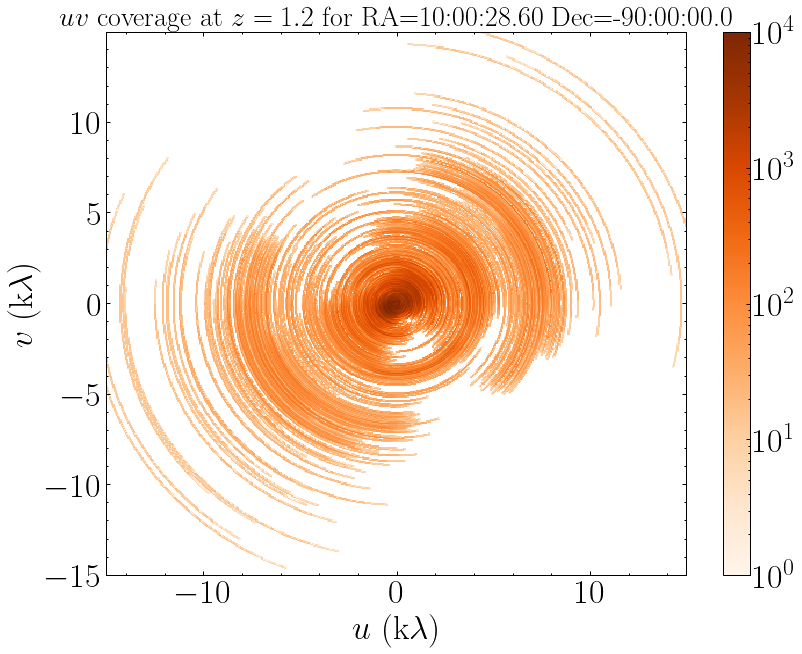

In [5]:
# plot UV coverage
plt.figure(figsize=(13, 10))
# xedges = np.arange(-22.2, 22.2, 0.06)
# yedges = np.arange(-22.2, 22.2, 0.06)
xedges = np.arange(-15.03, 15.03, 0.06)          # Δu = Δv = 60λ  or 20λ  30λ
yedges = np.arange(-15.03, 15.03, 0.06)          # Δu = Δv = 60λ
N, xedges, yedges= np.histogram2d(utot, vtot, bins=(xedges, yedges))
N = N.T
# print(len(N), len(xedges), len(yedges),N.min(),N.max())
c_uv = plt.pcolormesh(xedges, yedges, N, cmap ='Oranges', norm=LogNorm(1, 1e4)) 
plt.colorbar(c_uv).ax.tick_params(labelsize=34)
plt.tick_params(labelsize=34)
plt.xlabel('$u$ (k$\lambda$)', fontsize=34)
plt.ylabel('$v$ (k$\lambda$)', fontsize=34)
# plt.xticks(fontsize=34)
# plt.yticks(fontsize=34)
plt.title('$uv$ coverage at $z=%.1f$ for RA=%s Dec=%s'%(zz,target.radec()[0], target.radec()[1]), fontsize=28)
plt.savefig("./results/uv_results/UV_coverage_UHF_-90.pdf")
plt.savefig("./results/uv_results/UV_coverage_UHF_-90.jpg")
plt.show()

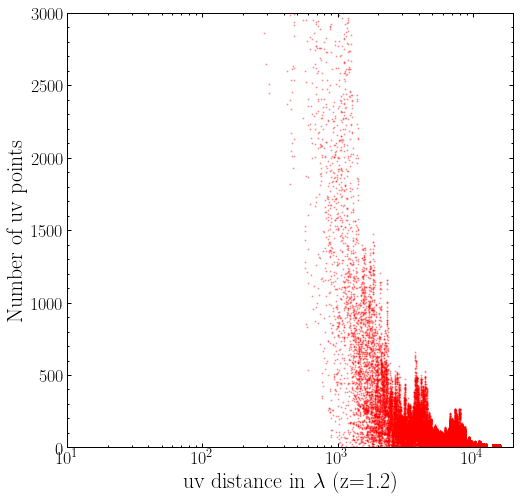

In [6]:
xedges = np.arange(-27030, 27030, 60)  # give a large ranges, if not, max uv distance will make mistake
yedges = np.arange(-27030, 27030, 60)
N, xedges, yedges= np.histogram2d(utot*1000, vtot*1000, bins=(xedges, yedges))  # kλ ---> λ
N = N.T

x1=[]
y1=[]
for i in range(len(xedges)-1):
    #xedge = (xedges[i]+xedges[i+1])/2
    x1.append(xedges[i])
for i in range(len(yedges)-1):
    #yedge = (yedges[i]+yedges[i+1])/2
    y1.append(yedges[i])

# plot Number of uv points
plt.figure(figsize=(8, 8))
uv_distance=[]
for i in range(len(x1)):
    for j in range(len(y1)):
        if N[i,j]==0:
            pass
        else:
            plt.plot((x1[i]**2+y1[j]**2)**0.5, N[i,j], color="red", marker='.', alpha = 0.3,  markersize=2)
            aa=(x1[i]**2+y1[j]**2)**0.5
            bb=N[i,j]
            uv_distance.append([aa,bb])

np.savetxt('./results/uv_results/10h_uv_distance_-90_%.2f.txt'%zz, uv_distance) 

plt.xscale("log")
plt.xlim(10,2e4)
plt.ylim(0,3000)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 22,
         }
plt.xlabel('uv distance in $\lambda$ (z=%s)'%zz, font1)
plt.ylabel('Number of uv points', font1)
plt.savefig("./results/uv_results/10h_Num_uv_-90_%.2f.pdf"%zz)
plt.show()

In [7]:
data = np.loadtxt('./results/uv_results/10h_uv_distance_-90_%.2f.txt'%zz,usecols=(0, 1))
data = data.T
x_uv = data[0]
y_uv = data[1]
print(x_uv.min(), x_uv.max(),y_uv.min(),y_uv.max())

sum=0
n=0
N_uv=[]
bins=np.arange(40, 31040,100)
# print(bins)
for i in range(len(bins)):
    for j in range(len(x_uv)):
        if x_uv[j]>bins[i] and x_uv[j]<bins[i+1]:
            n=n+1
            sum=sum+y_uv[j]
        if n==0:
            pass
        else:  
            average=sum/n
    N_uv.append(average)
    n=0
    sum=0

x=[]      
bins=np.arange(40, 31140,100)
for i in range(len(bins)-1):
    xx = (bins[i]+bins[i+1])/2
    x.append(xx)

Num_uv=[]
for i in range(len(x)):
    Num_uv.append([bins[i],N_uv[i]])
np.savetxt('./results/uv_results/10h_number_uv_-90_%.2f.txt'%zz, Num_uv)

42.42640687119285 15789.521842031823 1.0 14107.0


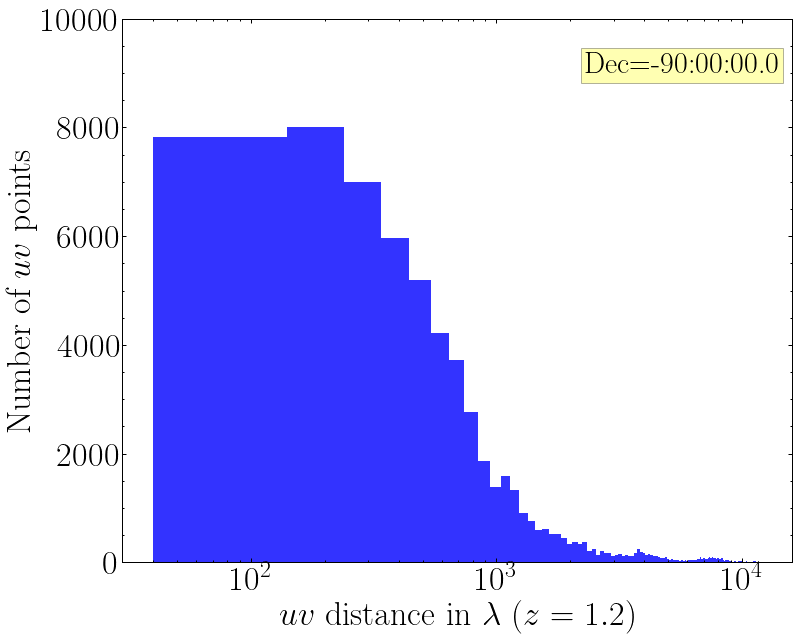

In [10]:
plt.figure(figsize=(12, 10))
# plt.hist(y_uv,  bins, histtype='step', stacked='bar', fill=False)
plt.bar(x, N_uv, width=100, color="blue",alpha=0.8)

plt.xscale("log")
plt.xlim(30,16000)
plt.ylim(0,10000)
plt.xticks(fontsize=34)
plt.yticks(fontsize=34)
plt.xlabel('$uv$ distance in $\lambda$ ($z=%.1f$)'%zz, fontsize=34)
plt.ylabel('Number of $uv$ points', fontsize=34)
plt.text(2300,9000,'Dec=%s'%(target.radec()[1]), bbox=dict(facecolor='yellow', alpha=0.3),fontsize=30)
# plt.text(2500,2700,'COSMOS field', bbox=dict(facecolor='yellow', alpha=0.3),fontsize=30)
# plt.title('Number of uv points for ra=%s dec=%s'%(target.radec()[0], target.radec()[1]), fontsize=18)
plt.savefig("./results/uv_results/Number_uv_UHF_-90.pdf")
plt.savefig("./results/uv_results/Number_uv_UHF_-90.jpg")
plt.show()